# Аналитика в авиакомпании

## Описание проекта:  
Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### ЗАДАНИЕ - Составить SQL_запросы 

### Описание данных - База данных об авиаперевозках:  

**Таблица airports — информация об аэропортах:**  
airport_code — трёхбуквенный код аэропорта  
airport_name — название аэропорта  
city — город  
timezone — временная зона  
Таблица aircrafts — информация об самолётах:  
aircraft_code — код модели самолёта  
model — модель самолёта  
range — количество самолётов  

**Таблица tickets — информация о билетах:**  
ticket_no — уникальный номер билета  
passenger_id — персональный идентификатор пассажира  
passenger_name — имя и фамилия пассажира  

**Таблица flights — информация о рейсах:**  
flight_id — уникальный идентификатор рейса  
departure_airport — аэропорт вылета  
departure_time — дата и время вылета  
arrival_airport — аэропорт прилёта  
arrival_time — дата и время прилёта  
aircraft_code – id самолёта  

**Таблица ticket_flights — стыковая таблица «рейсы-билеты»**  
ticket_no — номер билета  
flight_id — идентификатор рейса  

**Таблица festivals — информация о фестивалях**  
festival_id — уникальный номер фестиваля  
festival_date — дата проведения фестиваля  
festival_city — город проведения фестиваля  
festival_name — название фестиваля  

***Ссылка на схему связей таблиц:***
https://drive.google.com/file/d/1TaRUKjA_dv67QTmbkqtVehELmH-czVWB/view?usp=sharing  

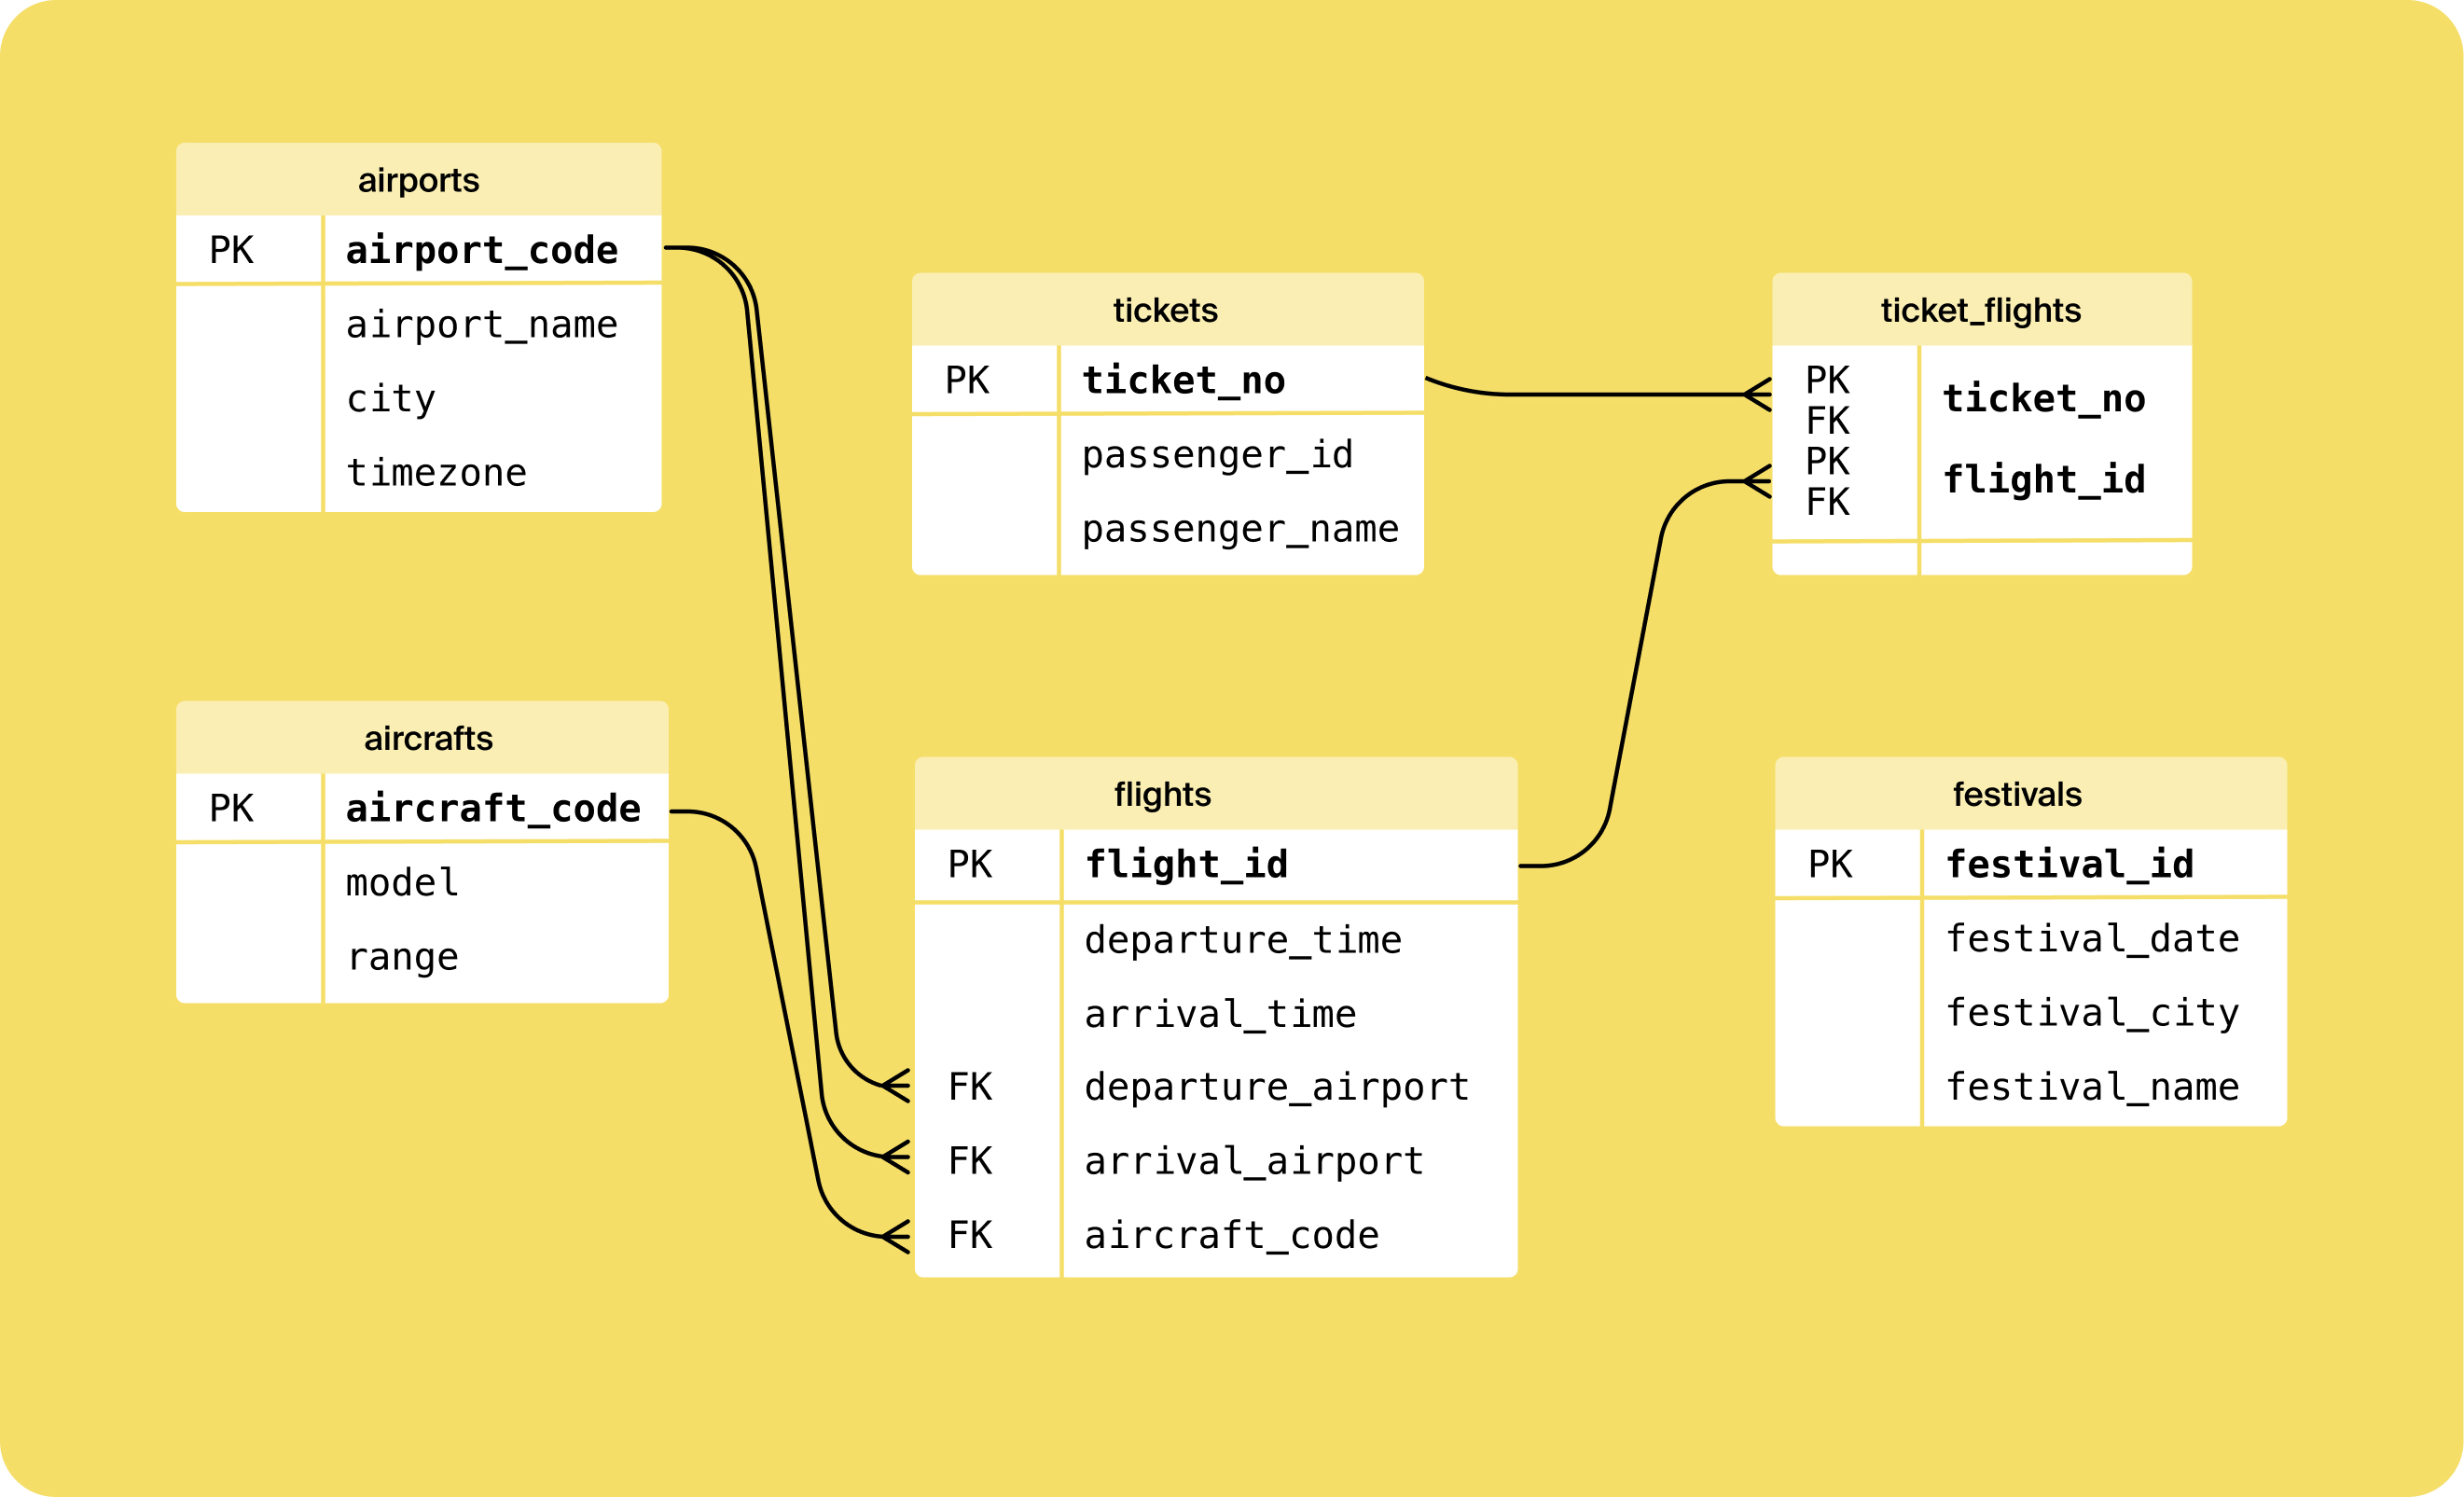

In [10]:
from IPython.core.display import Image, display
display(Image('air_tables_scheme.jpg', width=900, unconfined=True))

**Импортируем библиотеки и подключаемся к базе данных**

**!! По-скольку задачи выполнялись в программе-тренажере, реальные координаты базы данных не известны. Поэтому вывести результаты запросов нет возможности.**

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt

In [ ]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', 
 'pwd': '*****', 
 'host': '*****.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': '*****'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

### ЗАДАЧА №1:   
Изучите таблицу airports и выведите список городов (city), в которых есть аэропорты.

In [ ]:
query = ''' 

SELECT DISTINCT CITY
FROM airports 
;

''' 
request = pd.io.sql.read_sql(query, con = engine)
request

### ЗАДАЧА №2:  
Изучите таблицу flights и подсчитайте количество вылетов (flight_id) из каждого аэропорта вылета (departure_airport). Назовите переменную cnt_flights и выведите её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. Результат отсортируйте в порядке убывания количества вылетов.

In [ ]:
query = '''

SELECT 
    departure_airport,
    COUNT(flight_id) AS cnt_flights 
FROM flights 
GROUP BY departure_airport
ORDER BY cnt_flights DESC
; 

''' 
request = pd.io.sql.read_sql(query, con = engine)
request

### ЗАДАЧА №3:  
Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившийся столбец flights_amount и выведите его, также выведите столбец model.
Столбцы выводите в таком порядке:
  * model
  * flights_amount

In [ ]:
query = '''

SELECT 
    aircrafts.model AS model,
    COUNT(FLIGHT_ID) AS flights_amount
--    ,DATE_TRUNC('month', DEPARTURE_TIME)::date AS d_month
FROM flights
    INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE DATE_TRUNC('month', DEPARTURE_TIME)::date = '2018-09-01' 
GROUP BY model --,d_month
--WHERE DEPARTURE_TIME::date >= '2018-09-01' AND DEPARTURE_TIME::date <= '2018-09-30'
;

''' 
request = pd.io.sql.read_sql(query, con = engine)
request

### ЗАДАЧА №4:  
Посчитайте количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре. Типы моделей поместите в столбец type_aircraft, а количество рейсов — во flights_amount. Выведите их на экран.

In [ ]:
query = '''

SELECT 
--    EXTRACT(month FROM flights.DEPARTURE_TIME) AS md,
--    aircrafts.MODEL,
    
    CASE
        WHEN aircrafts.MODEL LIKE 'Boeing%'  THEN 'Boeing'
        WHEN aircrafts.MODEL LIKE 'Airbus%'  THEN 'Airbus'
        ELSE 'other' 
    END AS aircraft_type ,
    
    COUNT(flights.FLIGHT_ID) AS flights_amount

FROM flights 
    INNER JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
    
GROUP BY aircraft_type , EXTRACT(month FROM flights.DEPARTURE_TIME)
HAVING EXTRACT(month FROM flights.DEPARTURE_TIME)=9
/*
HAVING (aircrafts.MODEL='Boeing 767-300' OR aircrafts.MODEL='Boeing 767-300' 
        OR aircrafts.MODEL!=('Boeing 767-300' OR 'Boeing 767-300')))
*/
--WHERE EXTRACT(month FROM flights.DEPARTURE_TIME)='9'	
;

''' 
request = pd.io.sql.read_sql(query, con = engine)
request

### ЗАДАЧА №5:  

Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
Выводите столбцы в таком порядке:
  * city,
  * average_flights.

In [ ]:
query = '''

SELECT
    SUB.city,
    AVG(SUB.cnt_flights) AS average_flights
FROM
    (SELECT 
        airports.city AS city,
        COUNT(flights.flight_id) AS cnt_flights
        ,flights.ARRIVAL_TIME::date
    FROM flights 
        INNER JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code 
        INNER JOIN airports ON airports.airport_code = flights.arrival_airport
    WHERE EXTRACT(month FROM flights.ARRIVAL_TIME) = 8
    GROUP BY city, flights.ARRIVAL_TIME::date 
        HAVING flights.ARRIVAL_TIME::date BETWEEN '2018-08-01' AND '2018-08-31') AS SUB

GROUP BY SUB.city
;

''' 
request = pd.io.sql.read_sql(query, con = engine)
request

### ЗАДАЧА №6:   

Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

In [ ]:
query = '''

SELECT 
    festival_name ,
    EXTRACT(week FROM FESTIVAL_DATE::date) AS festival_week
FROM festivals 
WHERE festival_city = 'Москва' AND FESTIVAL_DATE::date BETWEEN '2018-07-23' AND '2018-09-30'
;

''' 
request = pd.io.sql.read_sql(query, con = engine)
request

### ЗАДАЧА №7:   
Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу, в которой будет информация о количестве купленных за неделю билетов; отметка, проходил ли в эту неделю фестиваль; название фестиваля festival_name и номер недели week_number.
Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name

In [ ]:
query = '''

SELECT 
    fl_tick.week_number AS week_number ,
    COUNT(ticket_no) AS ticket_amount ,
    fest.festival_week AS festival_week ,
    fest.festival_name AS festival_name
    
FROM (SELECT festival_name ,
        EXTRACT(week FROM FESTIVAL_DATE::date) AS festival_week
        FROM festivals 
        WHERE festival_city = 'Москва' AND FESTIVAL_DATE::date BETWEEN '2018-07-23' AND '2018-09-30') 
        AS fest
RIGHT JOIN
    (SELECT 
        ticket_flights.ticket_no AS ticket_no,
        flights.arrival_airport AS arrival_airport,
        flights.departure_time::date AS departure_time, 
        airports.city AS city,
        EXTRACT(week FROM departure_time::date) AS week_number 
    FROM flights 
        LEFT JOIN airports ON airports.airport_code = flights.arrival_airport
        LEFT JOIN ticket_flights ON flights.flight_id = ticket_flights.flight_id
    WHERE airports.city ='Москва' AND flights.departure_time::date BETWEEN '2018-07-23' AND '2018-09-30'
    --ORDER BY departure_time 
     )
    AS fl_tick 
ON fest.festival_week = fl_tick.week_number

GROUP BY week_number, festival_week, festival_name
;

''' 
request = pd.io.sql.read_sql(query, con = engine)
request